In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 3:  Interpolation and applications

## Question 1

Consider data at three points $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$.

**(a)** [ 8 pts] Analytically find coefficients of the interpolating  polynomial $P_2(x)$ that passes through these three points in the following bases
1. Monomial: $P(x) = p_0 + p_1 x + p_2 x^2$
1. Lagrange: $P(x) = \sum^2_{k=0} y_k \ell_k(x)$


and show that, independent of basis it's always the same polynomial.



For monomial, we have that 
\begin{align*}
0 &= p_0 \\
2 &= p_0 + p_1 + p_2 \\
2 &= p_0 + 2 p_1 + 4 p_2
\end{align*}
Thus, 
\begin{align*}
p_0 &= 0 \\
p_1 &= 3 \\ 
p_2 &= -1
\end{align*}
We have monomial $P(x) = 3x - x^2$. 

For lagrange, 
\begin{align*}
\ell_0(x) = \frac{x-1}{0-1} \cdot \frac{x-2}{0-2} = \frac{1}{2} x^2 - \frac{3}{2} x + 1\\
\ell_1(x) = \frac{x-0}{1-0} \cdot \frac{x-2}{1-2} = -x^2 + 2x\\
\ell_2(x) = \frac{x-0}{2-0} \cdot \frac{x-1}{2-1} = \frac{1}{2} x^2 - \frac{1}{2} x\\
\end{align*}
The Lagrange interpolating polynomial is 
\begin{align*}
L(x) &= 0 \cdot (\frac{1}{2} x^2 - \frac{3}{2} x + 1) + 2 \cdot (-x^2 + 2x) + 2 \cdot (\frac{1}{2} x^2 - \frac{1}{2} x) \\ 
&= -x^2 + 3x
\end{align*}

These two methods give the same polynomial. 

**(b)** [4 pts] Any $N+1$ distinct values of $x$ uniquely define the $N+1$ Lagrange polynomials $\ell_0(x), \ell_1(x)\ldots\ell_N(x)$

show that these functions satisfy 

$$\sum^N_{i=0} \ell_i(x) = 1$$

for all values of $x$ (not just the nodes).  We say that the Lagrange polynomials form a "Partition of Unity" because they always sum to 1.

Hint:  consider interpolation of a constant function, $f(x) = c$ sampled at $N+1$ distinct points.


We have 
\begin{align*}
\sum^N_{i=0} \ell_i(x) = \sum^N_{i=0} y_i \ell_i(x), \text{ where } y_i = 1 \  \forall i. 
\end{align*}
Use $L(x) = \sum^N_{i=0} y_i \ell_i(x) = f(x)$, where in this case $y_i = 1$ for all $i$ gives constant $f(x)$ with value $1$. Thus, 
\begin{align*}
\sum^N_{i=0} y_i \ell_i(x) = 1 = \sum^N_{i=0} \ell_i(x). 
\end{align*}

## Question 2: Fun with Chebyshev Polynomials

**(a)** [4 pts] The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$\omega(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} \omega(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} 
a & ~ & m = n \\ 
0 & ~ & m \neq n 
\end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).  Note that you may have multiple non-zero coefficients $a$.  Make sure to cover all these cases and list the conditions that you will find these values.

For 
\begin{align*}
    \int^1_{-1} \omega(x) T_n(x) T_m(x) dx, 
\end{align*}
we use substitution $x = \cos(\theta)$. Then, 
\begin{align*}
    &\int_0^{\pi} \frac{1}{\sqrt{1 - \cos^x(\theta)}} T_n(\cos(\theta)) T_m(\cos(\theta)) (-\sin(\theta)) d\theta \\ 
    =& \int_0^{\pi} \frac{\cos(n\theta)\cos(m\theta)}{\sin(\theta)} (-\sin(\theta)) d\theta \\ 
    =& -\int_0^{\pi} \cos(n\theta)\cos(m\theta) d\theta \\ 
    =& \int_0^{\pi} \frac{1}{2} (\cos(\theta(m-n)) + \cos(\theta(m+n))) d\theta
\end{align*}

When $m \neq n$, it gives 
\begin{align*}
    \left[ \frac{1}{2} \frac{\sin(\theta(m-n))}{m-n} + \frac{1}{2} \frac{\sin(\theta(m+n))}{m+n}\right]_0^{\pi} = 0
\end{align*}

When $m = n \neq 0$, it gives 
\begin{align*}
    &\int_0^{\pi} \frac{1}{2} (\cos(0) + \cos(2n\theta)) d\theta \\ 
    =& \int_0^{\pi} \frac{1}{2} (1 + \cos(2n \theta)) d\theta \\ 
    =& \frac{\pi}{2} + [\frac{\sin(2n\theta)}{2n}]_0^{\pi} \\ 
    =& \frac{\pi}{2}
\end{align*}

When $m = n = 0$, it gives 
\begin{align*}
    &\int_0^{\pi} \frac{1}{2} (\cos(0) + \cos(0)) d\theta \\ 
    =& \int_0^{\pi} 1 d\theta \\ 
    =& \pi
\end{align*}

Thus, we have 
\begin{align*}
\int^1_{-1} \omega(x) T_n(x) T_m(x) dx = 
\begin{cases} 
0 & ~ & m \neq n \\ 
\pi & ~ & m = n = 0 \\
\frac{\pi}{2} & ~ & m = n \neq 0
\end{cases} 
\end{align*}

**(b)** [4 pts] Consider the  Gaussian 
$$ f(x) = e^{-(x-3)^2} $$ on the interval $x\in[0,6]$

make a plot comparing the polynomial interpolant through $N=11$ points using 
* Evenly spaced points
* The appropriate Chebyshev nodes (i.e. roots of $T_{11}$: **note** you will need to transform the nodes defined on the interval $s\in[-1,1]$ to $x\in[0,6]$)

Be sure to show both the interpolation points and a reasonably resolved interpolating polynomial $P_{10}(x)$, and label all lines and axes.

You can use any of the routines from the notes or `numpy.polyfit` and `numpy.polyval`.  
For fun, experiment with other functions (e.g. Runge's function $f(x) = 1/(1 + 25x^2)$)

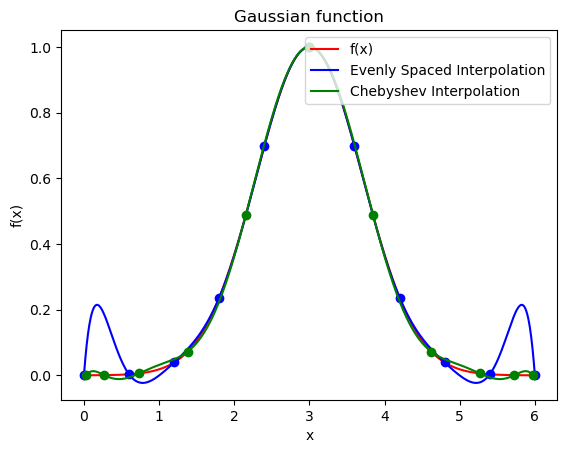

In [13]:
f = lambda x: numpy.exp(-(x-3)**2)
x = numpy.linspace(0, 6, 1000)

# Interpolation with N evenly spaced points
N = 11
x_even = numpy.linspace(0, 6, N)
y_even = f(x_even)
f_even = numpy.polyfit(x_even, y_even, N-1)
fx_even = numpy.polyval(f_even, x)

# Interpolation with Chebyshev points
N = 11
x_cheb = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)
x_cheb = (x_cheb + 1) * 3 # Map x_cheb from [-1, 1] to [0, 6]
y_cheb = f(x_cheb)
f_cheb = numpy.polyfit(x_cheb, y_cheb, N-1)
fx_cheb = numpy.polyval(f_cheb, x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x), 'r', label="f(x)")
axes.plot(x_even, y_even, 'bo')
axes.plot(x, fx_even, 'b', label="Evenly Spaced Interpolation")
axes.plot(x_cheb, y_cheb, 'go')
axes.plot(x, fx_cheb, 'g', label="Chebyshev Interpolation")
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_title("Gaussian function")
axes.legend(loc=1)
plt.show()

**(c)** [4 pts] define the relative error as
        
$$
 r = \frac{||f(x) - P_N(x)||}{||f(x)||}
$$

where $||\cdot||$ is an appropriate norm (length) of a vector, in python you can calculate this by

```python
x = numpy.linspace(x_min, x_max)
P_N = numpy.polyval(p, x)

err = f(x) - P_N(x)
r = numpy.linalg.norm(err)/numpy.linalg.norm(f(x))
```

* Make a well labeled plot showing log(r) vs number of grid points $N$ for $N\in[5,30]$ 
* Comment briefly on your results. Some questions to consider are:
    *  does $P_N(x)\rightarrow f(x)$ as $N\rightarrow\infty$?
    *  Is one interpolant more accurate than the other?
    * Anything else you notice

C:\Users\31040\AppData\Local\Temp\ipykernel_19388\235444454.py:8: RankWarning: Polyfit may be poorly conditioned
  p = numpy.polyfit(x_even, y_even, N-1)
C:\Users\31040\AppData\Local\Temp\ipykernel_19388\235444454.py:8: RankWarning: Polyfit may be poorly conditioned
  p = numpy.polyfit(x_even, y_even, N-1)
C:\Users\31040\AppData\Local\Temp\ipykernel_19388\235444454.py:8: RankWarning: Polyfit may be poorly conditioned
  p = numpy.polyfit(x_even, y_even, N-1)
C:\Users\31040\AppData\Local\Temp\ipykernel_19388\235444454.py:17: RankWarning: Polyfit may be poorly conditioned
  p = numpy.polyfit(x_cheb, y_cheb, N-1)
C:\Users\31040\AppData\Local\Temp\ipykernel_19388\235444454.py:8: RankWarning: Polyfit may be poorly conditioned
  p = numpy.polyfit(x_even, y_even, N-1)
C:\Users\31040\AppData\Local\Temp\ipykernel_19388\235444454.py:17: RankWarning: Polyfit may be poorly conditioned
  p = numpy.polyfit(x_cheb, y_cheb, N-1)
C:\Users\31040\AppData\Local\Temp\ipykernel_19388\235444454.py:8: RankWarn

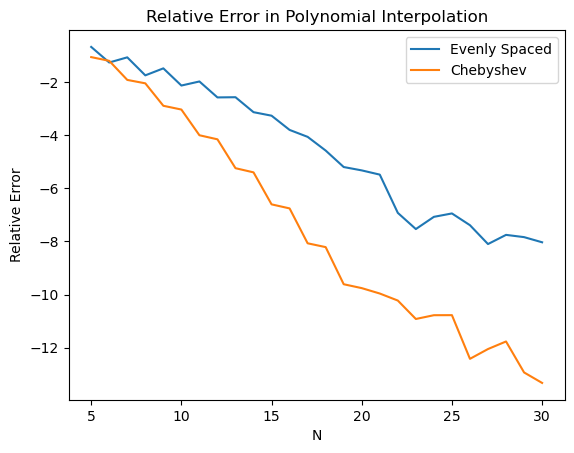

In [15]:
x = numpy.linspace(0, 6)

r_even_list = []
r_cheb_list = []
for N in range(5, 31):
    x_even = numpy.linspace(0, 6, N)
    y_even = f(x_even)
    p = numpy.polyfit(x_even, y_even, N-1)
    P_N = numpy.polyval(p, x)
    err = f(x) - P_N
    r = numpy.linalg.norm(err) / numpy.linalg.norm(f(x))
    r_even_list.append(r)
    
    x_cheb = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)
    x_cheb = (x_cheb + 1) * 3
    y_cheb = f(x_cheb)
    p = numpy.polyfit(x_cheb, y_cheb, N-1)
    P_N = numpy.polyval(p, x)
    err = f(x) - P_N
    r = numpy.linalg.norm(err) / numpy.linalg.norm(f(x))
    r_cheb_list.append(r)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(range(5, 31), numpy.log(r_even_list), label="Evenly Spaced")
axes.plot(range(5, 31), numpy.log(r_cheb_list), label="Chebyshev")
# axes.semilogy(range(5, 31), r_list)
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
axes.set_title("Relative Error in Polynomial Interpolation")
axes.legend(loc=1)
plt.show()

Overall, $P_N(x) \to f(x)$ as $N \to \infty$ since the relative error tends to decrease when $N$ increases. Chebyshev interpolant is more accurate comparing to the evenly sampled polynomial interpolation as we can see it always has lower error. It is also worth noting that having one more sampling point may lead to less accurate result, but result will eventually become more accurate if we keep adding more sampling points. 

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.   

Here we will construct a matrix   $D$  such that multiplying a vector of $\mathbf{y}$ values would lead to a second order approximation of the First derivative for the given data. 

In other words, defining the two vectors   $\mathbf{x}=[x_0, x_1,\ldots,x_N]^T$ and $\mathbf{y}=[y_0, y_1,\ldots,y_N]^T$  such that

$$\mathbf{y} = f(\mathbf{x})$$

for some scalar function $f$,  find a matrix $D$ such that 

$$
f'(\mathbf{x}) \approx D\mathbf{y}
$$

**(a)** [16] Using any method of your choice, derive the following finite-difference formulas for 3 equispaced points $x_i, x_{i+1}, x_{i+2}$ 

* 2nd-order accurate approximation to the *1st derivative* at  point 
    * $x_i$ (forward differences)
    * $x_{i+1}$ (centered differences)
    * $x_{i+2}$ (backward differences)
* 2nd-order accurate approximation to the *2nd derivative* evaluated at each point (hint: think before you grind)

Some hints:
1. consider the interpolating polynomial $P_2(x)$ through those 3 points and calculate $P'_2(x)$ at each point.
2. the method of undetermined coefficients on Taylor's series can be useful here as well



For forward first derivative, we have 
\begin{align*}
    F'(x_i) =& \frac{a_0 F(x_i) + a_1 F(x_{i+1}) + a_2 F(x_{i+2})}{\Delta x} \\ 
    =& \frac{1}{\Delta x} [ a_0(F(x) + F'(x) \cdot 0 + \frac{F''(x)}{2} \cdot (0)^2) + a_1(F(x) \\
    &+ F'(x) \cdot \Delta x + \frac{F''(x)}{2} \cdot (\Delta x)^2) + a_2(F(x) + F'(x) \cdot 2\Delta x + \frac{F''(x)}{2} \cdot (2\Delta x)^2) ]
\end{align*}
Thus, we need 
\begin{align*}
    \begin{cases}
        a_0 + a_1 + a_2 = 0 \\ 
        a_1 + 2 a_2 = 1 \\ 
        a_1 + 4 a_2 = 0
    \end{cases}
\end{align*}
This means $a_0 = - \frac{3}{2}$, $a_1 = 2$, $a_2 = - \frac{1}{2}$. 

For second derivative, we just change the left hand side to $F''(x_i)$ and the denominator at right hand side to $(\Delta x)^2$. We get $a_0 = \frac{1}{2}$, $a_1 = -1$, $a_2 = \frac{1}{2}$. 

For centered difference, 
\begin{align*}
    F'(x_{i+1}) =& \frac{1}{\Delta x} [ a_0(F(x) + F'(x) \cdot (-\Delta x) + \frac{F''(x)}{2} \cdot (-\Delta x)^2) + a_1(F(x) \\
    &+ F'(x) \cdot 0 + \frac{F''(x)}{2} \cdot (0)^2) + a_2(F(x) + F'(x) \cdot \Delta x + \frac{F''(x)}{2} \cdot (\Delta x)^2) ]
\end{align*}
Thus, $a_0 = - \frac{1}{2}$, $a_1 = 0$, $a_2 = \frac{1}{2}$. For second order, $a_0 = \frac{1}{2}$, $a_1 = -1$, $a_2 = \frac{1}{2}$. 

For backward difference, 
\begin{align*}
    F'(x_{i+2}) =& \frac{1}{\Delta x} [ a_0(F(x) + F'(x) \cdot (-2\Delta x) + \frac{F''(x)}{2} \cdot (-2\Delta x)^2) + a_1(F(x) \\
    &+ F'(x) \cdot (-\Delta x) + \frac{F''(x)}{2} \cdot (-\Delta x)^2) + a_2(F(x) + F'(x) \cdot 0 + \frac{F''(x)}{2} \cdot (0)^2) ]
\end{align*}
Thus, $a_0 = \frac{1}{2}$, $a_1 = -2$, $a_2 = \frac{3}{2}$. For second order, $a_0 = \frac{1}{2}$, $a_1 = -1$, $a_2 = \frac{1}{2}$. 

**(b)** [4] Now consider an equispaced set of points  $y_i = f(x_i)$.  Can you describe the structure of a consistent 2nd order, first derivative matrix $D$,  such that 

$$
    f'(\mathbf{x}) \approx D\mathbf{y}
$$

returns the consistent 1st derivative at every point (including the end points)

We can use forward difference method for $f'(x_0)$ and backward difference method for $f'(x_N)$. And use centered difference method for all the remaining points. Then for matrix $D$, the first three elements in the first row are given as the coefficients for the forward method. Similarly, the last three elements in the last row are the coefficients for backward method. For the remaining rows, row $i$ will only have non-zero elements at column $i-1$, $i$, $i+1$, while each of them are given by the coefficient of centered difference. 

**(c)** [4] Using the function `fdcoeffV.py` described in class (and included with this homework), write a python function that takes in a numpy array of coordinates $x$ (not necessarily evenly spaced)  and returns a matrix $D$ that calculates the consistent 2nd-order 1st derivatives at each point using 3 nearest neighbors (be careful at the edges)

Given this matrix $D$, it is easy to test it for various functions and meshes

In [23]:
from  fdcoeffV import fdcoeffV

def D1(x):
    """
    Computes a finite difference matrix for approximating the first derivative 
    with second-order accuracy using a consistent central difference scheme.
    
    x: ndarray of coordinates
    D: ndarray
        Matrix (2-D ndarray ) to calculate consistent 2nd order first derivative
    """
    
    D = numpy.zeros((len(x), len(x)))
    
    for i in range(len(x)):
        if i == 0: 
            D[i, 0:3] = fdcoeffV(1, x[i], x[0:3])
        elif i == len(x) - 1:
            D[i, -3:] = fdcoeffV(1, x[i], x[-3:])
        else:
            D[i, i-1:i+2] = fdcoeffV(1, x[i], x[i-1:i+2])
    return D

In [24]:
# Let's test this using f(x) = sin(pi*x) on a uniform mesh
N = 200
x = numpy.linspace(-1, 1, N)
dx = x[1]-x[0]

pi = numpy.pi
y = lambda x: numpy.sin(pi*x)
y_prime = lambda x: pi*numpy.cos(pi*x)

print("Uniform mesh: ",end='')
numpy.testing.assert_allclose(numpy.dot(D1(x), y(x)), y_prime(x), rtol=1e-2)
print("Success!")

# test on a randomized mesh
x_rand = x + dx/3.*numpy.random.rand(N)
print("Random mesh: ",end ='')
numpy.testing.assert_allclose(numpy.dot(D1(x_rand), y(x_rand)), y_prime(x_rand), rtol=1e-2)
print("Success!")



Uniform mesh: Success!
Random mesh: Success!


**(d)** [6] make a beautiful convergence plot showing how the relative error in your finite element approximation

$$ r = \frac{||f'(\mathbf{x}) - D\mathbf{y}||}{||f'(\mathbf{x})||}$$

 scales with mesh spacing $\Delta x$ for $f(x) = \sin(\pi x)$ on the interval $x\in[-1,1]$.  What is the expected rate of convergence?  Compare with the best fit straight line (in log space) to your error estimates.

C:\Users\31040\AppData\Local\Temp\ipykernel_19388\1241118185.py:23: RuntimeWarning: invalid value encountered in log
  axes.plot(x, numpy.log(P), label="Best Fit Line")


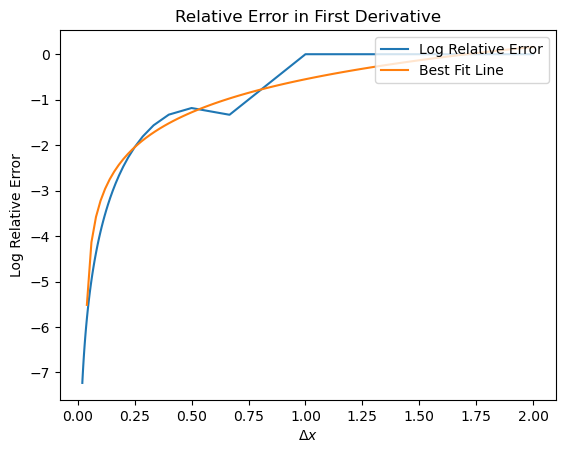

Expected rate of convergence:  0.5970912287296684


In [26]:
f = lambda x: numpy.sin(numpy.pi * x)
f_prime = lambda x: numpy.pi * numpy.cos(numpy.pi * x)

N = 100

r_list = []
delta_x_list = []
for i in range(2, N): 
    x = numpy.linspace(-1, 1, i)
    delta_x = x[1] - x[0]
    D = D1(x)
    err = f_prime(x) - numpy.dot(D, f(x))
    r_list.append(numpy.linalg.norm(err) / numpy.linalg.norm(f_prime(x)))
    delta_x_list.append(delta_x)
    
p = numpy.polyfit(delta_x_list, r_list, 1)
x = numpy.linspace(delta_x_list[0], delta_x_list[-1], 100)
P = numpy.polyval(p, x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(delta_x_list, numpy.log(r_list), label="Log Relative Error")
axes.plot(x, numpy.log(P), label="Best Fit Line")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("Log Relative Error")
axes.set_title("Relative Error in First Derivative")
axes.legend(loc=1)
plt.show()

# Compute the expected rate of convergence
print("Expected rate of convergence: ", p[0])

The expected rate of convergence is about $0.597$. We can see from the graph that when $1 \leq \Delta x \leq 2$, the relative error is really large and do not change significantly with $\Delta x$. When $\Delta x < 1$, the relative error starts to decrease significantly with decreasing $\Delta x$. 

**(e)** [4] Suppose we knew the *first derivative* of a function $f(x)$ at a discrete set of points and wanted to solve for the discrete function itself.  i.e.  ideally given $D$ and vector $\mathbf{y} = f'(\mathbf{x})$,  we would like to be able to solve the linear algebra problem

$$
    D\mathbf{f} = \mathbf{y}
$$

for $\mathbf{f}\approx f(\bf{x})$.  Discuss any issues we might have with this approach.

We will need to invert matrix $D$ to revover $f$ using $f = D^{-1} y$, which may leads to numerical instability due to matrix inversion. An example of recovering $f(x) = \sin(\pi x)$ is shown below. We can see in the plot that the recoverd $f$ is really unstable. 

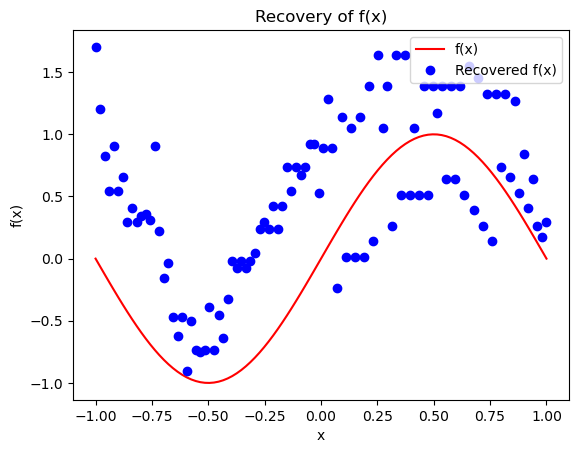

In [30]:
f = lambda x: numpy.sin(numpy.pi * x)
f_prime = lambda x: numpy.pi * numpy.cos(numpy.pi * x)

x = numpy.linspace(-1, 1, 100)
f_recovered = numpy.dot(numpy.linalg.inv(D1(x)), f_prime(x))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x), 'r', label="f(x)")
axes.plot(x, f_recovered, 'bo', label="Recovered f(x)")
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_title("Recovery of f(x)")
axes.legend(loc=1)
plt.show()